In [3]:
from qiskit import IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)

qr = QuantumRegister(5)
meas_cals, state_labels = complete_meas_cal(qubit_list=[0,2], qr=qr)
backend = IBMQ.get_backend('ibmqx4')
job=backend.retrieve_job('5cce0ca12e585300709f30b5')

In [4]:
cal_results = job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

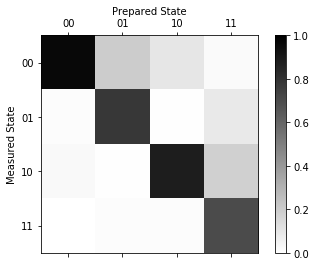

In [5]:
meas_fitter.plot_calibration()

In [7]:
for run_job in backend.jobs():
        print(run_job.job_id() + "    " + run_job.creation_date())

5cce8c3a433e6300735a811f    2019-05-05T07:09:46.588Z
5cce0ca12e585300709f30b5    2019-05-04T22:05:21.146Z
5cce018b557a5600718c544a    2019-05-04T21:18:03.516Z
5cc77c6b4a3cca0071ca5df5    2019-04-29T22:36:27.510Z
5cc77a4ef610f5006cd798e1    2019-04-29T22:27:26.654Z
5cc768dca688e800743f80f4    2019-04-29T21:12:59.212Z
5cc76858f610f5006cd798cc    2019-04-29T21:10:48.466Z
5cc76775eb97400071dc5b1d    2019-04-29T21:07:01.226Z
5cc47914b2f4f00071ae426e    2019-04-27T15:45:24.627Z
5c881680b8ae38005cd52b34    2019-03-12T20:28:48.680Z
5c842b867df9cd00528a991e    2019-03-09T21:09:26.149Z
5c8429496795420051d1ad2a    2019-03-09T20:59:53.157Z
5be9510117436b0052751cc8    2018-11-12T10:08:01.868Z
5be70d5b054f3d005ae77a6c    2018-11-10T16:54:50.971Z
5be706cfa9ff0f0053fa23a3    2018-11-10T16:26:55.315Z
5be705c6846b1b0052e14fc6    2018-11-10T16:22:30.094Z


C:\Users\TOMASZSTOPA\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqbackend.py:180: DeprecationWarning: Some jobs (4) are in a no-longer supported format. These jobs will stop working after Qiskit 0.7. Save the results or send the job with Qiskit 0.7+. Old jobs:
 - 5be9510117436b0052751cc8
 - 5be70d5b054f3d005ae77a6c
 - 5be706cfa9ff0f0053fa23a3
 - 5be705c6846b1b0052e14fc6
  DeprecationWarning)


In [15]:
job_experiment=backend.retrieve_job('5cce8c3a433e6300735a811f')

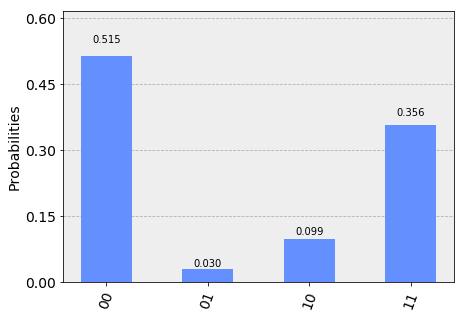

In [16]:
from qiskit.tools.visualization import plot_histogram
result = job_experiment.result()
raw_counts=result.get_counts()

plot_histogram(raw_counts)

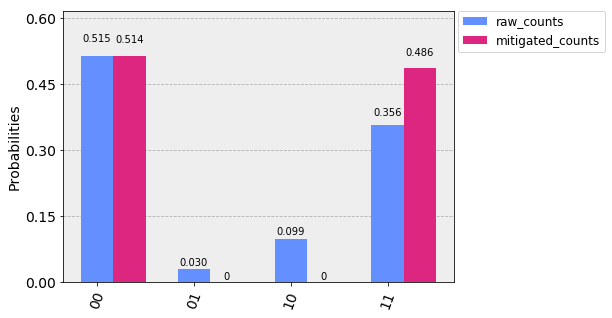

In [18]:
# Create a measurement filter from the calibration matrix
meas_filter = meas_fitter.filter

# Apply the filter to the raw counts to mitigate 
# the measurement errors
mitigated_counts = meas_filter.apply(raw_counts)

plot_histogram([raw_counts, mitigated_counts], 
               legend=["raw_counts", "mitigated_counts"])